## Mortality age-specific by country

#### Github: https://github.com/Otsile54459/Assignment
#### Data source: https://ghdx.healthdata.org/record/ihme-data/gbd-2010-mortality-results-1970-2010

 
#### Description: 
A large-scale study, known as the GBD Study 2010, assessed the impact of various diseases, injuries, and risk factors on mortality rates around the world. This collaborative effort, led by the Institute for Health Metrics and Evaluation (IHME), involved several prestigious universities and the World Health Organization (WHO).
The study examined death counts and mortality rates in 187 countries, 21 regions, and the entire globe. This data encompassed various age groups and genders for five years: 1970, 1980, 1990, 2000, and 2010. Additionally, the study investigated the likelihood of death between ages 15 and 60 (45q15) and between birth and age 5 (5q0). It also calculated average lifespans for these locations and years, categorized by se

The findings of this comprehensive study were published in a prestigious medical journal, The Lancet, in December 2012, under the title "Age-specific and sex-specific mortality in 187 countries, 1970-2010: a systematic analysis for the GBD Study 20010

## Data Cleaning

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv("IHME_GBD_2010_MORTALITY_AGE_SPECIFIC_BY_COUNTRY_1970_2010 (3).csv")
df

Country Code Country Name  Year  Age Group     Sex Number of Deaths  \
0              AFG  Afghanistan  1970   0-6 days    Male           19,241   
1              AFG  Afghanistan  1970   0-6 days  Female           12,600   
2              AFG  Afghanistan  1970   0-6 days    Both           31,840   
3              AFG  Afghanistan  1970  7-27 days    Male           15,939   
4              AFG  Afghanistan  1970  7-27 days  Female           11,287   
...            ...          ...   ...        ...     ...              ...   
58900          ZWE     Zimbabwe  2010  80+ years  Female            7,606   
58901          ZWE     Zimbabwe  2010  80+ years    Both           13,305   
58902          ZWE     Zimbabwe  2010   All ages    Male           82,010   
58903          ZWE     Zimbabwe  2010   All ages  Female           77,420   
58904          ZWE     Zimbabwe  2010   All ages    Both          159,430   

      Death Rate Per 100,000  
0                 318,292.90  
1                 219,544.20  
2                 270,200.70  
3                  92,701.00  
4                  68,594.50  
...                      ...  
58900              16,179.40  
58901              16,633.80  
58902               1,320.10  
58903               1,211.20  
58904               1,264.90  

[58905 rows x 7 columns]

#### check data types

In [68]:
df.dtypes

Country Code              object
Country Name              object
Year                       int64
Age Group                 object
Sex                       object
Number of Deaths          object
Death Rate Per 100,000    object
dtype: object

#### making columns names into good names

In [69]:
df.dtypes

Country Code              object
Country Name              object
Year                       int64
Age Group                 object
Sex                       object
Number of Deaths          object
Death Rate Per 100,000    object
dtype: object

In [70]:
df.rename(columns={"Country Name": "country_name", "Year": "year", "Age Group": "age_group", "Sex": "sex", "Number of Deaths": "number_death", "Death Rate Per 100,000": "death_rate_100k"}, inplace=True)
df.dtypes

Country Code       object
country_name       object
year                int64
age_group          object
sex                object
number_death       object
death_rate_100k    object
dtype: object

#### clean and make death_rate_100k to numeric
column will be made to float, because it a ratio

In [71]:
# check for missing values
df['death_rate_100k'].isnull().sum()

0

In [72]:
# show some data
df['death_rate_100k'].head()

0    318,292.90
1    219,544.20
2    270,200.70
3     92,701.00
4     68,594.50
Name: death_rate_100k, dtype: object

In [73]:
def clean_death_rate_100k(sample):
  sample = str(sample).lower().replace(",", "")
  return float(sample)
# 
df['death_rate_100k'] = df['death_rate_100k'].apply(clean_death_rate_100k)
df['death_rate_100k'].head()

0    318292.9
1    219544.2
2    270200.7
3     92701.0
4     68594.5
Name: death_rate_100k, dtype: float64

#### clean and make mumber of deaths to numeric
this column will be made to integer, because its counting people not points

In [74]:
# checking for null or missing values
df['number_death'].isnull().sum()

0

In [75]:
# check data types and values
df['number_death'].head()

0    19,241
1    12,600
2    31,840
3    15,939
4    11,287
Name: number_death, dtype: object

In [76]:
# use this method to clean the samples of number_death
def clean_numb_death(sample):
  sample = str(sample).lower().replace(",", "")
  return int(sample)

df['number_death'] = df['number_death'].apply(clean_numb_death)
df['number_death'].head()

0    19241
1    12600
2    31840
3    15939
4    11287
Name: number_death, dtype: int64

#### clean and normalise gender(sex) column
making difference genders to numbers helps to plot

In [77]:
df['sex'].unique()

array(['Male', 'Female', 'Both'], dtype=object)

In [78]:
df['sex'].isnull().sum()

0

In [79]:
# for replacing values
replace_sex = {'Male' : 1, 'Female': 2, 'Both': 3}
replace_sex_rev = {1: 'Male', 2: 'Female', 3: 'Both'}

df['gender'] = df['sex'].map(replace_sex)
df.head()

Country Code country_name  year  age_group     sex  number_death  \
0          AFG  Afghanistan  1970   0-6 days    Male         19241   
1          AFG  Afghanistan  1970   0-6 days  Female         12600   
2          AFG  Afghanistan  1970   0-6 days    Both         31840   
3          AFG  Afghanistan  1970  7-27 days    Male         15939   
4          AFG  Afghanistan  1970  7-27 days  Female         11287   

   death_rate_100k  gender  
0         318292.9       1  
1         219544.2       2  
2         270200.7       3  
3          92701.0       1  
4          68594.5       2

#### clean and normalise age group
this column will be left like this, no need to clean || make numeric

In [80]:
df['age_group'].unique()

array(['0-6 days', '7-27 days', '28-364 days', '1-4 years', '5-9 years',
       '10-14 years', '15-19 years', '20-24 years', '25-29 years',
       '30-34 years', '35-39 years', '40-44 years', '45-49 years',
       '50-54 years', '55-59 years', '60-64 years', '65-69 years',
       '70-74 years', '75-79 years', '80+ years', 'All ages'],
      dtype=object)

In [81]:
df.dtypes

Country Code        object
country_name        object
year                 int64
age_group           object
sex                 object
number_death         int64
death_rate_100k    float64
gender               int64
dtype: object

#### clean and verify column country
this data has 187 countries

In [82]:
df['country_name'].isnull().sum()

0

In [83]:
# check the number of countries
df['country_name'].unique().shape

(187,)

#### check for missing values and saw some information, remvoe duplicates

In [84]:
df.duplicated().sum()

0

In [85]:
df.dropna(inplace=True)

In [86]:
df.drop_duplicates(inplace=True)

In [87]:
df.isnull().sum()

Country Code       0
country_name       0
year               0
age_group          0
sex                0
number_death       0
death_rate_100k    0
gender             0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58905 entries, 0 to 58904
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Code     58905 non-null  object 
 1   country_name     58905 non-null  object 
 2   year             58905 non-null  int64  
 3   age_group        58905 non-null  object 
 4   sex              58905 non-null  object 
 5   number_death     58905 non-null  int64  
 6   death_rate_100k  58905 non-null  float64
 7   gender           58905 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 3.6+ MB


## Descriptive Stats

#### display count of sampls
- 58905 samples from this dataset

In [89]:
df.shape[0]

58905

#### display mean
from the data, the mean
- year is:  1990
- gender is: 2 for female
- number_death is : 16109.9 almost about 16110
- death_rate_100k is : 7062.9

In [90]:
df[['year', 'gender', 'number_death', 'death_rate_100k']].mean().__round__(1)

year                1990.0
gender                 2.0
number_death       16109.9
death_rate_100k     7062.9
dtype: float64

#### display the mode
show only the first row, because year has equal number of samples in each unique year

In [91]:
df[['year', 'gender', 'number_death', 'death_rate_100k']].mode().iloc[0]

year               1970.0
gender                1.0
number_death          5.0
death_rate_100k      39.1
Name: 0, dtype: float64

#### display median

In [92]:
df[['year', 'gender', 'number_death', 'death_rate_100k']].median()

year               1990.0
gender                2.0
number_death       1020.0
death_rate_100k     825.0
dtype: float64

#### display max and min values

In [93]:
df[['year', 'gender', 'number_death', 'death_rate_100k']].max()

year                  2010.0
gender                   3.0
number_death       9938487.0
death_rate_100k     423790.2
dtype: float64

In [94]:
df[['year', 'gender', 'number_death', 'death_rate_100k']].min()

year               1970.0
gender                1.0
number_death          0.0
death_rate_100k       5.5
dtype: float64

#### display 25, 50 and 75 quantile ranges

In [95]:
df[['year', 'gender', 'number_death', 'death_rate_100k']].quantile([0.25, 0.50, 0.75])

year  gender  number_death  death_rate_100k
0.25  1980.0     1.0         166.0            210.3
0.50  1990.0     2.0        1020.0            825.0
0.75  2000.0     3.0        4460.0           3611.8

#### display variance

In [96]:
df[['year', 'gender', 'number_death', 'death_rate_100k']].var()

year               2.000034e+02
gender             6.666780e-01
number_death       2.381754e+10
death_rate_100k    6.043017e+08
dtype: float64

#### display standard deviation

In [97]:
df[['year', 'gender', 'number_death', 'death_rate_100k']].std()

year                   14.142256
gender                  0.816504
number_death       154329.315405
death_rate_100k     24582.548947
dtype: float64

#### display z score

In [98]:
cols = df[['year', 'gender', 'number_death', 'death_rate_100k']]
(cols - cols.mean()) / cols.std()

year    gender  number_death  death_rate_100k
0     -1.414202 -1.224734      0.020288        12.660609
1     -1.414202  0.000000     -0.022743         8.643584
2     -1.414202  1.224734      0.101925        10.704253
3     -1.414202 -1.224734     -0.001108         3.483696
4     -1.414202  0.000000     -0.031251         2.503062
...         ...       ...           ...              ...
58900  1.414202  0.000000     -0.055103         0.370854
58901  1.414202  1.224734     -0.018175         0.389339
58902  1.414202 -1.224734      0.427009        -0.233612
58903  1.414202  0.000000      0.397268        -0.238041
58904  1.414202  1.224734      0.928664        -0.235857

[58905 rows x 4 columns]

#### display coefficient of variance
- show how scattered the samples are in a column from the mean

In [99]:
(cols.std() / cols.mean())

year               0.007107
gender             0.408252
number_death       9.579760
death_rate_100k    3.480534
dtype: float64

#### display ranges of the column
max value of a column, minus the min value of a column

In [100]:
(cols.max() - cols.min())

year                    40.0
gender                   2.0
number_death       9938487.0
death_rate_100k     423784.7
dtype: float64

## Data Visualisation

#### bar graphs of number of death per year
- from the graph the number of death has increased 

<Figure size 600x400 with 0 Axes>

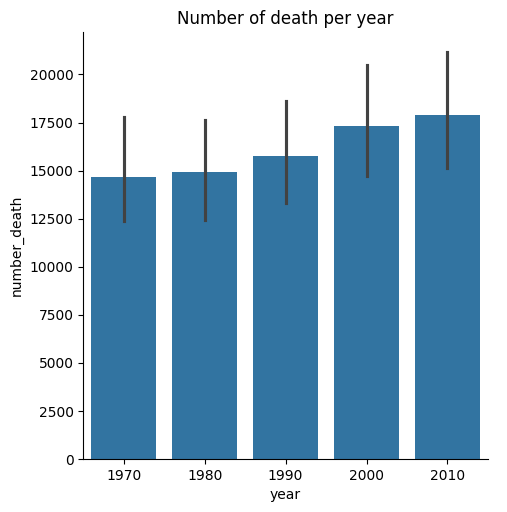

In [101]:
plt.figure(figsize=(6, 4))
sns.catplot(data=df, y='number_death', x='year', kind='bar')
plt.title("Number of death per year")
plt.show()

#### number of death per 100K per year

In [102]:
plt.figure(figsize=(4, 5))
sns.catplot(data=df, y='death_rate_100k', x='year', kind='bar')
plt.title("Number of death rate per 100,000") 
plt.ylabel("Death Rate Per 100,000")
plt.show()

<Figure size 400x500 with 0 Axes>

#### plot age with the number of death per 100K

In [103]:
plt.figure(figsize=(20, 4))

sns.barplot(data=df, y='death_rate_100k', x='age_group')
plt.xticks(rotation=30)
plt.title("show number of death per 100K by age group ")

plt.show()

#### plot age with the number of death

In [104]:
plt.figure(figsize=(20, 3))

sns.barplot(data=df, y='number_death', x='age_group')
plt.xticks(rotation=30)
plt.title("show number of death by age group")

plt.show()

#### plot a graph for the number of samples per age groups

In [105]:
# plt.figure(figsize=(18, 3))
# sns.countplot(data=df, x='country_name')
# plt.xticks(rotation=30)
# plt.title("numbers of samples per age group")
# plt.show()

#### Piecharts 
I decided to do two piecharts to interpret the data in the top 10 countries according to my data regarding number of deaths and deaths per rate. I am noticing that India is in the top 3 for both aspects.

In [106]:
country_data = df.groupby('country_name').agg({'number_death': 'sum', 'death_rate_100k': 'sum'})
country_data = country_data.sort_values(by='number_death', ascending=False)

top_countries = country_data.head(10)

# I wanted to generate 2 pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for number of deaths
axes[0].pie(top_countries['number_death'], labels=top_countries.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Top 10 Countries by Number of Deaths')

# Pie chart for death rate per 100,000
axes[1].pie(top_countries['death_rate_100k'], labels=top_countries.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Top 10 Countries by Death Rate Per 100,000')

plt.tight_layout()
plt.show()

#### Scatter plot of death rate per 100,000
Interpretation is that the data for Death Rate Per 100,000 is mostly concentrated underneath 100 000 and starts becoming less concentrated as the death per rates is increasing.

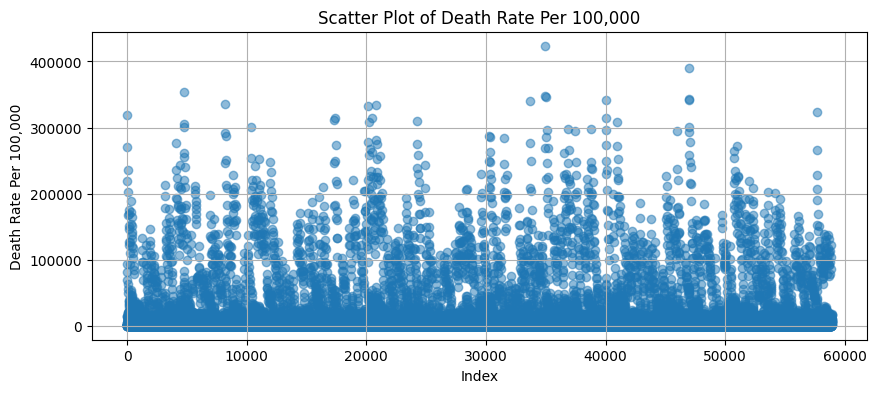

In [107]:
plt.figure(figsize=(10, 4))
plt.scatter(df.index, df['death_rate_100k'], alpha=0.5)
plt.title('Scatter Plot of Death Rate Per 100,000')
plt.xlabel('Index')
plt.ylabel('Death Rate Per 100,000')
plt.grid(True)
plt.show()


#### scatter plot of the number of death
Interpretation is that the data is concentrated mostly at the bottom just like the top one but there is not much data to interpret on the number of deaths just like Deaths rate per 100,000

In [108]:
plt.figure(figsize=(8, 4))
plt.scatter(df.index, df['number_death'], alpha=0.5)
plt.title('Scatter Plot of Number of Deaths')
plt.xlabel('Index')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

#### lkkkk

#### histogram

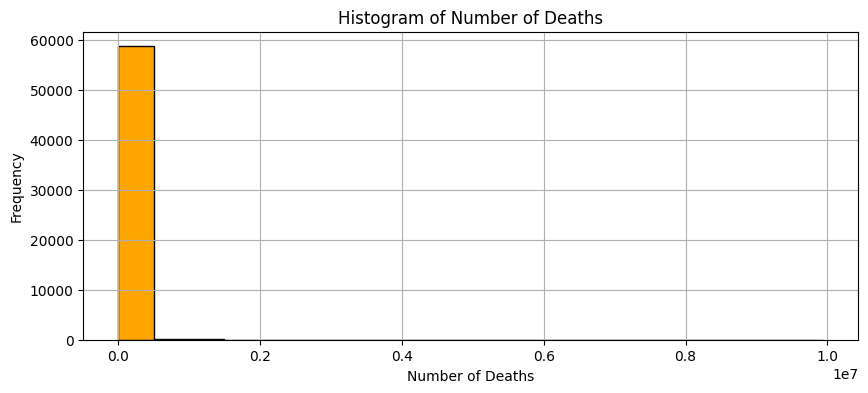

In [124]:
plt.figure(figsize=(10, 4))
plt.hist(df['number_death'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of Number of Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [125]:
plt.figure(figsize=(10, 4))
plt.hist(df['death_rate_100k'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of Death Rate Per 100,000')
plt.xlabel('Death Rate Per 100,000')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Boxplot of death rate per 100,000
The number of deaths is positively to the right and the death rate will be negatively skewed.


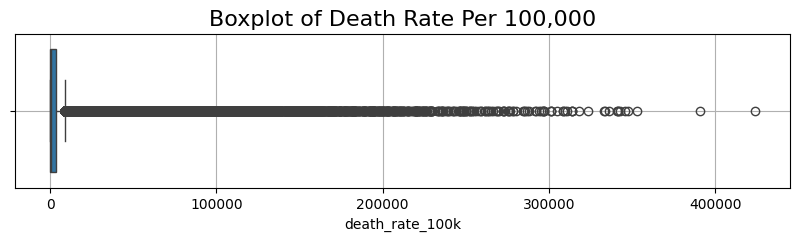

In [123]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=df, x='death_rate_100k')
plt.title('Boxplot of Death Rate Per 100,000', fontsize=16)
plt.grid(True)
plt.show()


#### Boxplot of number of death

In [122]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=df, x='death_rate_100k')
plt.title('Boxplot of Number of Deaths', fontsize=16)
plt.grid(True)
plt.show()

## Intrepration of my data set 

This data underscores the complex interplay of biological, social, and environmental factors influencing mortality patterns in different countries over the specifies . By understanding these dynamics, policymakers can formulate evidence-based strategies to promote healthier lives and achieve sustainable development goals.

Lesson learnt:
I found using jupyter notebook easier than excel. I was just a bit challenged on the part that I couldn't combine my data in one figure for some of the graphs because some data that I am comparing would overlap hence I had to do separate graphs for some. I would also get discouraged if I got an error and would want to change my data, this has taught me patience. I found comparing and analysing data using jupyter notebook more interesting
